In [50]:
import networkx as nx
import random
import numpy as np

G = nx.DiGraph()
G.add_nodes_from([i for i in range(6)])
labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F'}
    
for i in G.nodes():
    for j in G.nodes():
        if i != j:
            r = random.random()
            if r <= 0.3:
                G.add_edge(i, j)
            else:
                continue             
    
nodes = list(G.nodes())
points = [0 for _ in range(G.number_of_nodes())]
r = random.choice(nodes)
points[r] += 1
out = list(G.out_edges(r))
    
c = 0
while c != 500000:
    if len(out) == 0:
        focus = random.choice(nodes)
    else:
        r1 = random.choice(out)
        focus = r1[1]
            
    points[focus] += 1
    out = list(G.out_edges(focus))
    c += 1
    
points_array = np.array(points)
nodes_sorted_by_RW = np.argsort(-points_array)
    
print("Nodes ranked by Random Walk:", end = ' ')
for node_index in nodes_sorted_by_RW:
    print(labels[node_index], end = ' ')

Nodes ranked by Random Walk: A E B C D F 

In [51]:
pr = nx.pagerank(G)
pr_sorted = sorted(pr.items(), key = lambda x : x[1], reverse = True)
    
print("Nodes ranked by the inbuilt pagerank algorithm:", end = ' ')
for i in pr_sorted:
    print(labels[i[0]], end = ' ')

Nodes ranked by the inbuilt pagerank algorithm: A E B C D F 

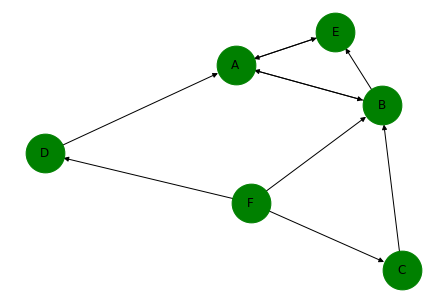

In [53]:
import matplotlib.pyplot as plt

nx.draw(G, node_size = 1500, labels = labels, node_color = "G", with_labels = True)
plt.show()